In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import json
import pandas as pd

# Load JSON data
with open('dataset.json', 'r') as f:
    data = json.load(f)

# Assuming your JSON data is in the following format:
# [{"external_status": "text1", "internal_status": "label1"}, {"external_status": "text2", "internal_status": "label2"}, ...]

# Convert JSON data to a DataFrame
df = pd.DataFrame(data)
df.sample(5)
# Now you can perform any further preprocessing or manipulation on the DataFrame as needed

,externalStatus,internalStatus
167,Off rail,Off Rail
860,Discharge,Departure
211,"Gate out, Empty",Empty Return
686,DEPARTCU,Departure
729,Load on MAERSK SEMBAWANG / 237E,Loaded on Vessel


In [ ]:
# Clean and preprocess the data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

In [ ]:
df['externalStatus'] = df['externalStatus'].apply(clean_text)

In [ ]:
# Encode internal status labels
label_encoder = LabelEncoder()
df['internal_status_label'] = label_encoder.fit_transform(df['internalStatus'])

In [ ]:
#Print the unique categories in internalStatus
unique_categories = df['internalStatus'].unique()

# Print the unique categories
print(unique_categories)

['Port Out' 'Inbound Terminal' 'Port In' 'Departure' 'Arrival' 'Gate In'
 'Loaded on Vessel' 'Gate Out' 'On Rail' 'Off Rail' 'Empty Return'
 'In-transit' 'Outbound Terminal' 'Empty Container Released'
 'Unloaded on Vessel']


In [ ]:
#Print the unique categories in internalStatus
unique_categories = df['externalStatus'].unique()

# Print the unique categories
print(unique_categories)

['port out' 'terminal in' 'port in'
 'vessel departure from first pol vessel name tian fu he'
 'vessel arrival at final pod vessel name tian fu he' 'departcu' 'gate in'
 'load on maersk sembawang e' 'discharge' 'gate out' 'load on msc sveva e'
 'load vessel name msc orion' 'discharge vessel name msc orion' 'on rail'
 'off rail' 'gate out empty' 'load on msc orion n' 'toll plaza crossed'
 'cfs out' 'cfs in' 'empty container release to shipper'
 'gate in to outbound terminal'
 'loaded on ym plum w at port of loading ym plum w'
 'ym plum w departure from port of loading ym plum w'
 'ym plum w arrival at port of discharging ym plum w'
 'unloaded from ym plum w at port of discharging ym plum w'
 'empty container returned from customer' 'empty container door arrival'
 'gate in to outbound cy' 'outbound rail loading'
 'outbound rail departure' 'outbound rail arrival'
 'outbound rail unloading' 'gate out from outbound cy'
 'loaded on tucapel e at port of loading tucapel e'
 'tucapel e departur

In [ ]:
import matplotlib.pyplot as plt

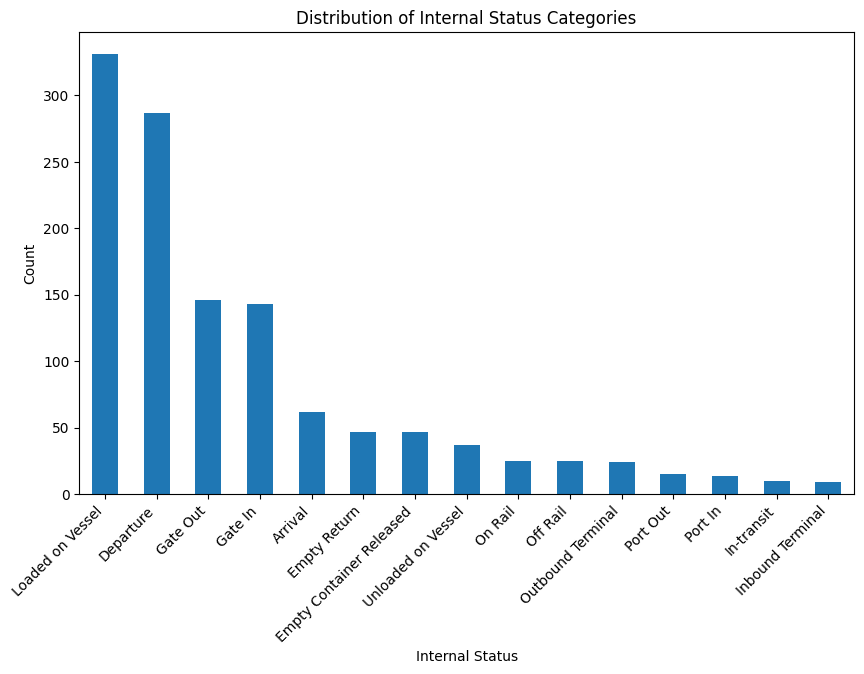

In [ ]:
# Assuming df is your DataFrame containing the dataset
category_counts = df['internalStatus'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Internal Status Categories')
plt.xlabel('Internal Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Split dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['externalStatus'],
                                                                    df['internal_status_label'],
                                                                    test_size=0.2,
                                                                    random_state=42)


In [ ]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

In [ ]:
# Pad sequences to ensure uniform length
maxlen = 100  # Choose a suitable max length
train_sequences = pad_sequences(train_sequences, padding='post', maxlen=maxlen)
val_sequences = pad_sequences(val_sequences, padding='post', maxlen=maxlen)

In [ ]:
#Now, let's move on to model development using TensorFlow:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=maxlen),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          11900     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 138379 (540.54 KB)
Trainable params: 138379 (540.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Now, let's train the model and evaluate its performance:
# Train the model
history = model.fit(train_sequences, train_labels, epochs=100, batch_size=64, validation_data=(val_sequences, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_sequences, val_labels)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Epoch 1/100
16/16 [==============================] - 3s 212ms/step - loss: 2.1596 - accuracy: 0.2641 - val_loss: 2.2604 - val_accuracy: 0.2163
Epoch 2/100
16/16 [==============================] - 3s 213ms/step - loss: 2.1450 - accuracy: 0.2590 - val_loss: 2.2714 - val_accuracy: 0.2163
Epoch 3/100
16/16 [==============================] - 5s 293ms/step - loss: 2.1606 - accuracy: 0.2815 - val_loss: 2.2681 - val_accuracy: 0.2163
Epoch 4/100
16/16 [==============================] - 3s 211ms/step - loss: 2.1589 - accuracy: 0.2579 - val_loss: 2.2689 - val_accuracy: 0.2163
Epoch 5/100
16/16 [==============================] - 3s 212ms/step - loss: 2.1464 - accuracy: 0.2579 - val_loss: 2.2804 - val_accuracy: 0.2163
Epoch 6/100
16/16 [==============================] - 4s 236ms/step - loss: 2.1549 - accuracy: 0.2641 - val_loss: 2.2613 - val_accuracy: 0.2163
Epoch 7/100
16/16 [==============================] - 4s 258ms/step - loss: 2.1409 - accuracy: 0.2702 - val_loss: 2.2677 - val_accuracy: 0.2163

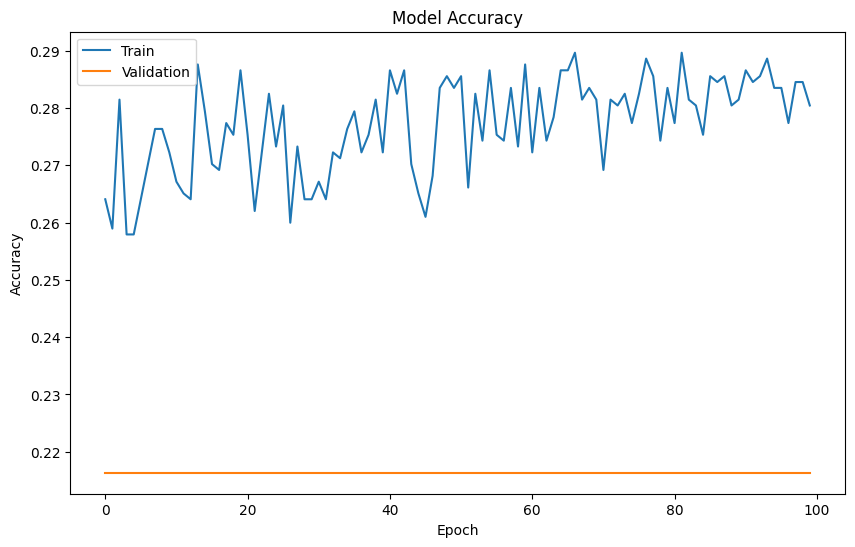

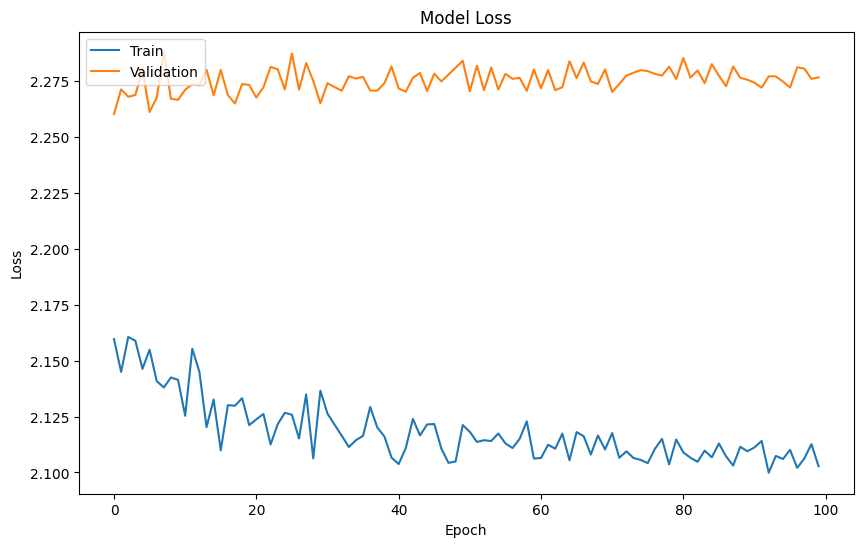

In [ ]:
#We can plot the graph and look into the accuracy and loss

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
#Lets try CNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          11900     
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                975       
                                                      

In [ ]:
# Train the model
history = model.fit(train_sequences, train_labels, epochs=100, batch_size=64, validation_data=(val_sequences, val_labels))

Epoch 1/100
16/16 [==============================] - 1s 64ms/step - loss: 0.1563 - accuracy: 0.9652 - val_loss: 0.1422 - val_accuracy: 0.9510
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 0.1335 - accuracy: 0.9662 - val_loss: 0.1069 - val_accuracy: 0.9837
Epoch 3/100
16/16 [==============================] - 1s 65ms/step - loss: 0.1024 - accuracy: 0.9775 - val_loss: 0.0859 - val_accuracy: 0.9837
Epoch 4/100
16/16 [==============================] - 2s 105ms/step - loss: 0.0855 - accuracy: 0.9785 - val_loss: 0.0753 - val_accuracy: 0.9959
Epoch 5/100
16/16 [==============================] - 1s 83ms/step - loss: 0.0773 - accuracy: 0.9785 - val_loss: 0.0571 - val_accuracy: 0.9959
Epoch 6/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0669 - accuracy: 0.9857 - val_loss: 0.0440 - val_accuracy: 0.9959
Epoch 7/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0556 - accuracy: 0.9887 - val_loss: 0.0375 - val_accuracy: 0.9959
Epoch

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_sequences, val_labels)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

8/8 [==============================] - 0s 11ms/step - loss: 0.0309 - accuracy: 0.9959
Validation Loss: 0.030931465327739716, Validation Accuracy: 0.9959183931350708


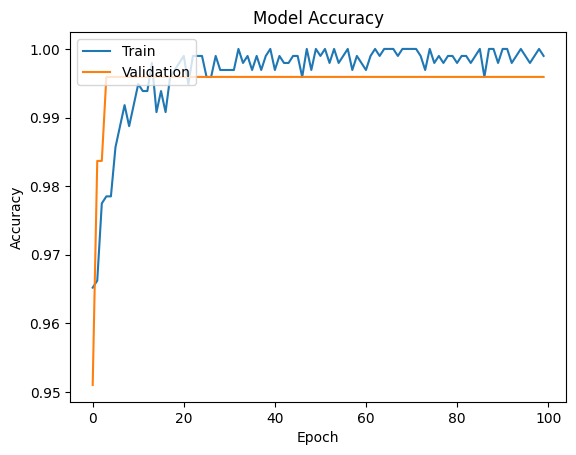

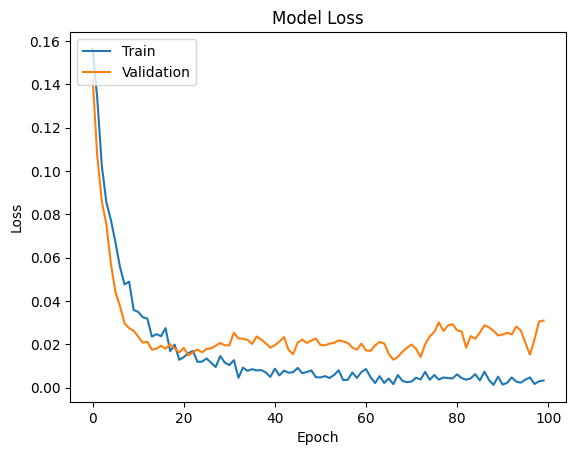

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [ ]:
#Now lets try Bidirectional LSTM
# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          11900     
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 15)                975       
                                                                 
Total params: 105611 (412.54 KB)
Trainable params: 105611 (412.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(train_sequences, train_labels, epochs=100, batch_size=64, validation_data=(val_sequences, val_labels))

Epoch 1/100
16/16 [==============================] - 10s 316ms/step - loss: 2.5553 - accuracy: 0.1208 - val_loss: 2.3183 - val_accuracy: 0.5673
Epoch 2/100
16/16 [==============================] - 3s 201ms/step - loss: 2.0821 - accuracy: 0.3828 - val_loss: 2.1201 - val_accuracy: 0.4408
Epoch 3/100
16/16 [==============================] - 3s 203ms/step - loss: 1.8235 - accuracy: 0.4893 - val_loss: 1.8288 - val_accuracy: 0.4490
Epoch 4/100
16/16 [==============================] - 5s 305ms/step - loss: 1.4682 - accuracy: 0.5271 - val_loss: 1.4763 - val_accuracy: 0.6816
Epoch 5/100
16/16 [==============================] - 3s 207ms/step - loss: 1.1343 - accuracy: 0.6581 - val_loss: 1.1891 - val_accuracy: 0.5714
Epoch 6/100
16/16 [==============================] - 3s 208ms/step - loss: 0.8725 - accuracy: 0.7175 - val_loss: 0.9413 - val_accuracy: 0.7959
Epoch 7/100
16/16 [==============================] - 4s 282ms/step - loss: 0.6709 - accuracy: 0.8506 - val_loss: 0.7547 - val_accuracy: 0.836

In [66]:
print("The validation loss and accuracy is 0.9878 and 0.0585 respectively for bidirectional LSTM")

The validation loss and accuracy is 0.9878 and 0.0585 respectively for bidirectional LSTM


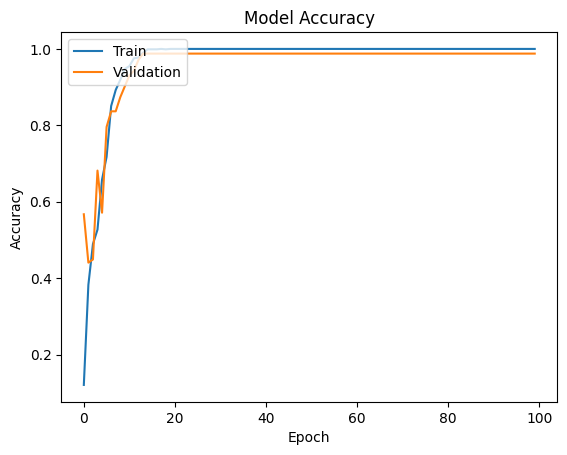

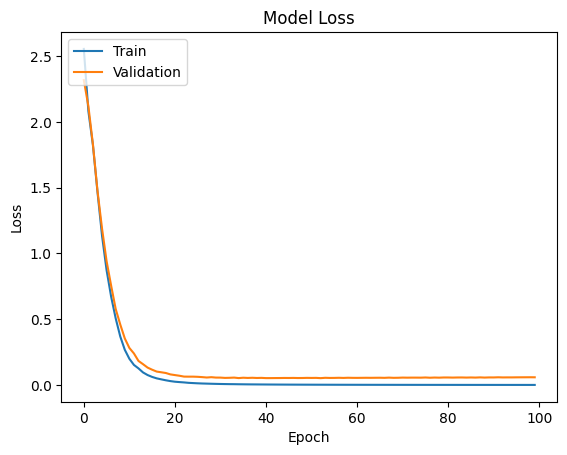

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
# Create a dictionary to store the performance metrics of each model
models_metrics = {
    'Model': ['Bidirectional LSTM', 'CNN', 'LSTM'],
    'Accuracy': [1, 0.9990, 0.2163265347480774],
    'Validation Accuracy': [0.9878, 0.9958, 0.2163],
    'Loss': [4.7823e-04, 0.0033, 2.1028],
    'Validation Loss': [0.0585, 0.0309, 2.2768]
}
#Here we have written the numerical values we can store them in variable and then we can display it
# Create a DataFrame from the dictionary
df = pd.DataFrame(models_metrics)

# Display the DataFrame
print(df)

                Model  Accuracy  Validation Accuracy      Loss  \
0  Bidirectional LSTM  1.000000               0.9878  0.000478   
1                 CNN  0.999000               0.9958  0.003300   
2                LSTM  0.216327               0.2163  2.102800   

   Validation Loss  
0           0.0585  
1           0.0309  
2           2.2768  


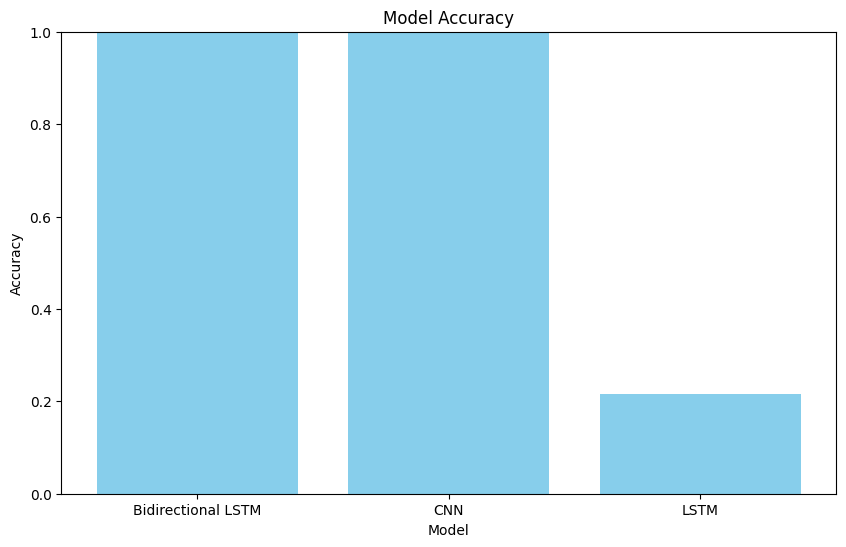

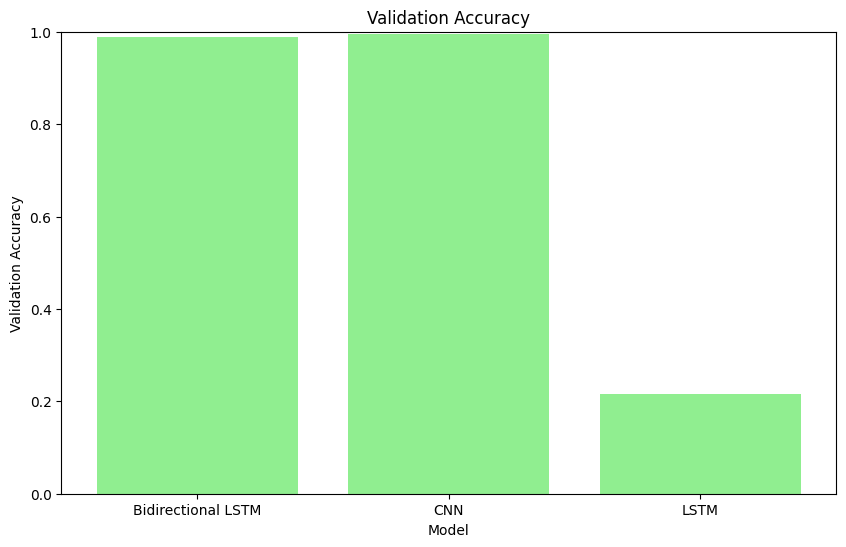

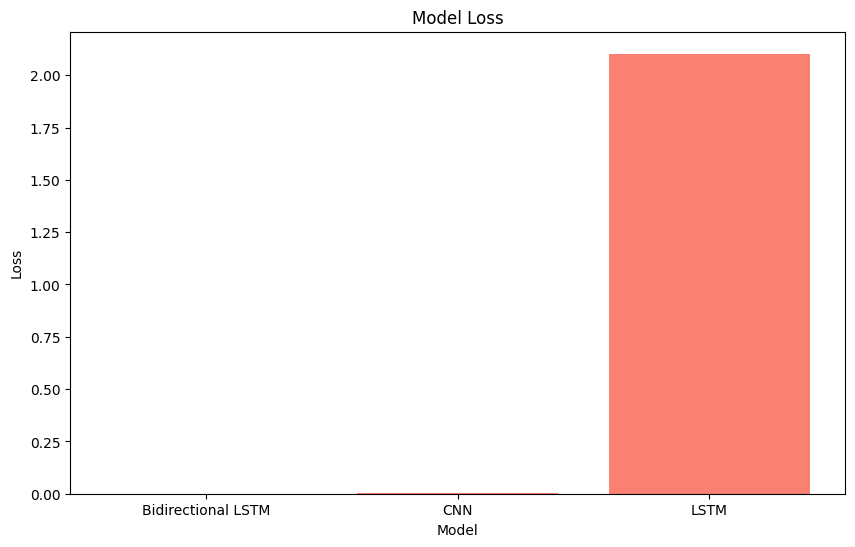

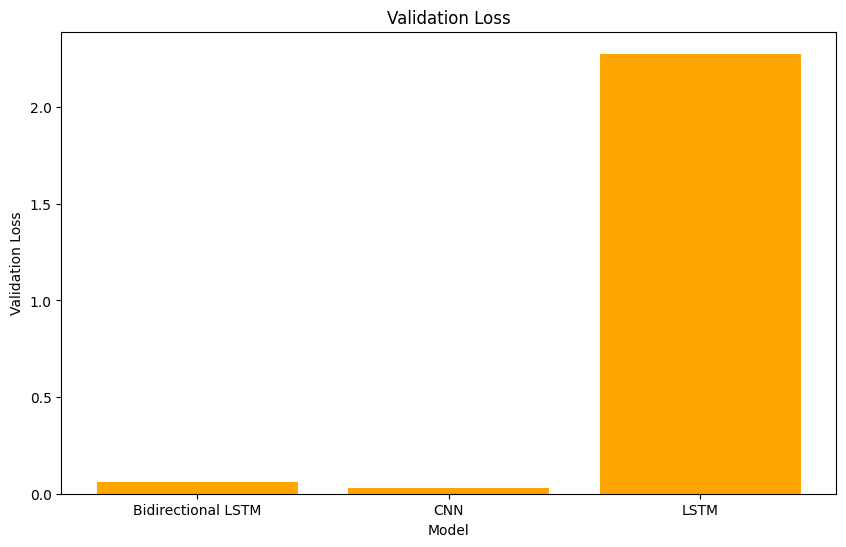

In [72]:
# Data
models = ['Bidirectional LSTM', 'CNN', 'LSTM']
accuracy = [1, 0.9990, 0.2163265347480774]
val_accuracy = [0.9878, 0.9958, 0.2163]
loss = [4.7823e-04, 0.0033, 2.1028]
val_loss = [0.0585, 0.0309, 2.2768]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to ensure consistency
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, val_accuracy, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to ensure consistency
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.bar(models, loss, color='salmon')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

# Plotting validation loss
plt.figure(figsize=(10, 6))
plt.bar(models, val_loss, color='orange')
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.title('Validation Loss')
plt.show()

### Bidirectional LSTM performs best out of all the three models that have been used as the number of epochs increase not only the validation loss is decreasing but also the validation accuracy is also improving.The CNN model seems little bit overfitted as the validation loss can be seen increasing even when the number of epochs increases. We have used 1-D CNN since it is a textual data and not image data.